# FM 5343

## Measuring Risk


In Chapter 3, we will study various ways that Risk can be measured quantitively.   Various proposed metrics will generally have one thing in common however, they will assume that variables of interest can be understood as Random Variables.   So a key step prior to calcalating these metrics, is to determine the relevant distribution(s) and to estimate their parameters.  

We will do a few examples to give an idea of how this works.

If you took FM 5222, this will basically be review.  Otherwise, consider a quick crash course.


In what follows, we will follow a simple paradigm:

1. Get some relevant data
2. Explore the data
3. Fit some candidate distributions
4. Make inferences given our choices.



## Get some data

We will assume (for simplicity) that we are concerned with exposure to the broad equity market, which we will represent with the S&P500.  Perhaps we are interested daily movements and wanted to know how likely a daily movement greater than $2.00\%$ is.  So we might grab daily returns for the last 10 years.

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 959 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:

import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
start = '2012-08-01'
end = '2022-08-01'

ticker = "^GSPC" 


SP500 = yf.download(ticker,start = start, end = end )



[*********************100%***********************]  1 of 1 completed


In [ ]:
SP500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-08-01,1379.319946,1385.030029,1373.349976,1375.319946,1375.319946,4440920000
2012-08-02,1375.130005,1375.130005,1354.650024,1365.000000,1365.000000,4193740000
2012-08-03,1365.449951,1394.160034,1365.449951,1390.989990,1390.989990,3751170000
2012-08-06,1391.040039,1399.630005,1391.040039,1394.229980,1394.229980,3122050000
2012-08-07,1394.459961,1407.140015,1394.459961,1401.349976,1401.349976,3682490000
...,...,...,...,...,...,...
2022-07-25,3965.719971,3975.300049,3943.459961,3966.840088,3966.840088,2988650000
2022-07-26,3953.219971,3953.219971,3910.739990,3921.050049,3921.050049,3083420000
2022-07-27,3951.429932,4039.560059,3951.429932,4023.610107,4023.610107,3584170000


Since will be intersted in daily returns, we have to decide what "kind" of return.  For a variety of reasons, log-returns are a good choice.

In [ ]:
SP500['LogClose'] = SP500['Adj Close']
      
SP500['LRet'] = np.log(SP500['LogClose']).diff()
      

In [ ]:
SP500

,Open,High,Low,Close,Adj Close,Volume,LogClose,LRet
Date,,,,,,,,
2012-08-01,1379.319946,1385.030029,1373.349976,1375.319946,1375.319946,4440920000,1375.319946,NaN
2012-08-02,1375.130005,1375.130005,1354.650024,1365.000000,1365.000000,4193740000,1365.000000,-0.007532
2012-08-03,1365.449951,1394.160034,1365.449951,1390.989990,1390.989990,3751170000,1390.989990,0.018861
2012-08-06,1391.040039,1399.630005,1391.040039,1394.229980,1394.229980,3122050000,1394.229980,0.002327
2012-08-07,1394.459961,1407.140015,1394.459961,1401.349976,1401.349976,3682490000,1401.349976,0.005094
...,...,...,...,...,...,...,...,...
2022-07-25,3965.719971,3975.300049,3943.459961,3966.840088,3966.840088,2988650000,3966.840088,0.001314
2022-07-26,3953.219971,3953.219971,3910.739990,3921.050049,3921.050049,3083420000,3921.050049,-0.011610
2022-07-27,3951.429932,4039.560059,3951.429932,4023.610107,4023.610107,3584170000,4023.610107,0.025820


#### Explore the data

As per usual, we make a histogram

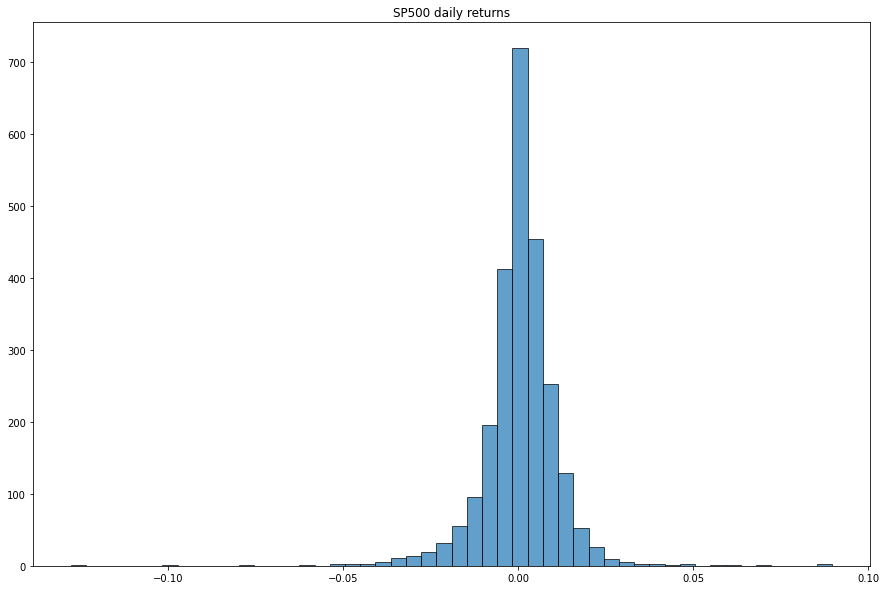

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(SP500.LRet, bins = 50, edgecolor = "BLack", alpha = .7)

plt.title("SP500 daily returns")

plt.show()


#### Fit the data

We then might attempt to fit a normal distribution to this, and we can readily do this with scipy.stats, which uses MLE




In [ ]:
import scipy.stats as ss


normalfit = ss.norm.fit(SP500.LRet.dropna())

normalfit

(0.00043741497200555423, 0.01080134103118223)

Just to get a sense what there mean, the first number is the mean (or location) and the second is the standard deviation (or scale).   We rescale to annual value to appreciate what this is telling us.

In [ ]:
print("The annualized average daily return is ", normalfit[0]*252)
print("The annualized average daily standard deviation is ", normalfit[1]*np.sqrt(252))

The annualized average daily return is  0.11022857294539967
The annualized average daily standard deviation is  0.17146597316703685


And if we like graphs, we can plot our fit along with the histogram.

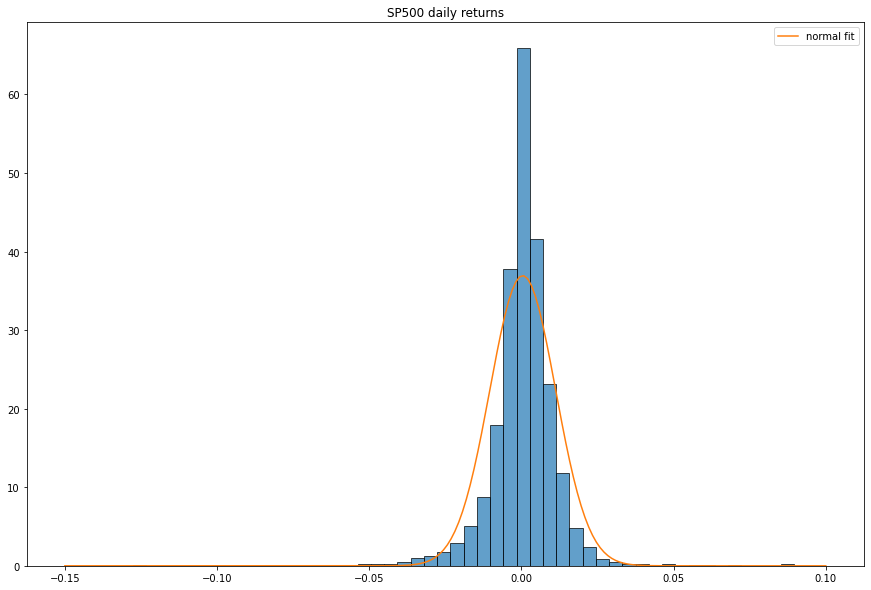

In [ ]:
t= np.linspace(-.15, .1,200)

plt.figure(figsize=(15,10))
plt.hist(SP500.LRet, bins = 50, edgecolor = "BLack", alpha = .7, density = True)
plt.plot(t, ss.norm.pdf(t, loc = normalfit[0], scale = normalfit[1]), label = "normal fit")

plt.legend()

plt.title("SP500 daily returns")

plt.show()

#### Make inference


Now, using our fit, we attempt to answer our question.  We note that if there is a movement of $-2.00\%$, then the log-return will be $\ln(.98)$ and that if the movement is $2.00\%$, the log-return will be $\ln(1.02)$   We therefore are asking, if $X$ is the log return, then what is

$$\mathrm{Pr}\left(X< \ln(.98) \text{ OR }  X>\ln(1.02)\right)$$


Hence we calculate

In [ ]:
prob1 = ss.norm.cdf(np.log(.98), loc = normalfit[0], scale=normalfit[1])  + ss.norm.sf(np.log(1.02), loc = normalfit[0], scale=normalfit[1])

prob1

0.06450791856352855

#### Comments?


### Why not just use the empirical CDF?  

Good idea!  Let's do that.

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(SP500.LRet)

In [ ]:
prob_emp = ecdf(np.log(.98)) + (1- ecdf(np.log(1.02)))

prob_emp


0.0548707753479125

### Wouldn't the Student T make more sense because of Kurtosis?


Let's try that.

In [ ]:
Tfit = ss.t.fit(SP500.LRet.dropna())

Tfit

(2.494827967631854, 0.000882152909662206, 0.005821300591303024)

We see the df is about $2.5$ which suggest some pretty strong "fat tailed" behavior.

Let's plot again

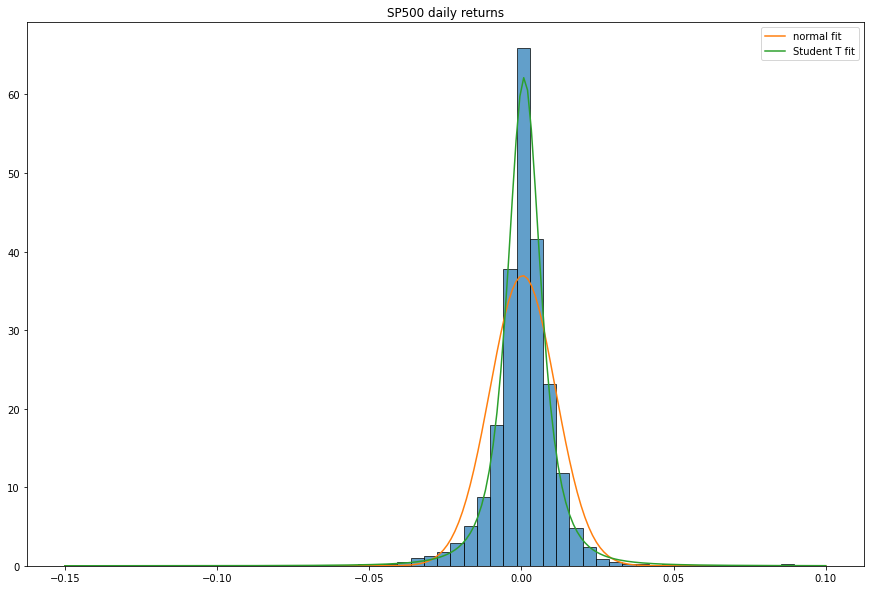

In [ ]:
t= np.linspace(-.15, .1,200)

plt.figure(figsize=(15,10))
plt.hist(SP500.LRet, bins = 50, edgecolor = "BLack", alpha = .7, density = True)
plt.plot(t, ss.norm.pdf(t, loc = normalfit[0], scale = normalfit[1]), label = "normal fit")

plt.plot(t, ss.t.pdf(t, df = Tfit[0], loc = Tfit[1], scale = Tfit[2]), label = "Student T fit")

plt.legend()

plt.title("SP500 daily returns")

plt.show()

Recalculating the probabilties using our new fit:

In [ ]:
prob2 = ss.t.cdf(np.log(.98),df = Tfit[0], loc = Tfit[1], scale = Tfit[2])  + ss.t.sf(np.log(1.02),df = Tfit[0], loc = Tfit[1], scale = Tfit[2])

prob2

0.055137428499048416

### Comment

Note the emperical probability of a movement greater than $2\%$ is actually lower than the normal approximation.  Is this what you expect with kurtosis?



